In [9]:
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import uproot
import pandas as pd
import numpy as np
import random
import csv
import time

%matplotlib notebook

In [10]:
# All parameter inputs will be integers.

# First parameter:  number of total events.
# Second parameter: number of noise hits per event.
# Third parameter:  number of tracks per event.
# Fourth Parameter: number of hits that lie on each track.
# Fifth Parameter:  max limit on random number generator.
# Sixth Parameter:  specific event you want to plot for visualization.

# Creates a csv file with name: toy_data_final.csv
# For the column, Track?, 0 represents no, 1 represents yes.

def main(number_of_events, 
         number_of_noise_hits, 
         tracks_per_event, 
         number_of_track_hits,
         random_limit,
         event_plotter):    
    start = time.time()
    event_number = 0
    with open('toy_data_final.csv', 'w', newline = '') as f:
        thewriter = csv.writer(f)

        thewriter.writerow(['Event Number', 'X - Coordinate', 
                            'Y - Coordinate', 'Z - Coordinate',
                            'Track?'])
    
        for i in range(number_of_events):
            if event_number == event_plotter:
                fig = plt.figure()
                ax = fig.add_subplot(111, projection = '3d')
            
            for i in range(number_of_noise_hits):
                x = random.uniform(1, random_limit)
                y = random.uniform(1, random_limit)
                z = random.uniform(1, random_limit)
                
                if event_number == event_plotter:
                    ax.scatter(x, y, z)
                
                thewriter.writerow([event_number, x, y, z, 0])
            
            for i in range(tracks_per_event):
                X_1 = random.uniform(1, random_limit)
                Y_1 = random.uniform(1, random_limit)
                Z_1 = random.uniform(1, random_limit)
                X_2 = random.uniform(1, random_limit)
                Y_2 = random.uniform(1, random_limit)
                Z_2 = random.uniform(1, random_limit)
                
                #thewriter.writerow([event_number, X_1, Y_1, Z_1, 1])
                #thewriter.writerow([event_number, X_2, Y_2, Z_2, 1])

                point_1 = [X_1, Y_1, Z_1]
                point_2 = [X_2, Y_2, Z_2]

                vector_x = (X_2 - X_1)
                vector_y = (Y_2 - Y_1)
                vector_z = (Z_2 - Z_1)

                vector = [vector_x, vector_y, vector_z]

                vector_length = math.sqrt((vector_x * vector_x) + 
                                          (vector_y * vector_y) + 
                                          (vector_z * vector_z))

                normal_x = (vector_x / vector_length)
                normal_y = (vector_y / vector_length)
                normal_z = (vector_z / vector_length)

                normal = [normal_x, normal_y, normal_z]

                for i in range(number_of_track_hits):
                    scalar = random.uniform(1, random_limit)

                    alpha_x = X_1 + (scalar * (normal_x))
                    alpha_y = Y_1 + (scalar * (normal_y))
                    alpha_z = Z_1 + (scalar * (normal_z))
                    
                    thewriter.writerow([event_number, alpha_x, alpha_y, alpha_z, 1])

                    alpha = [alpha_x, alpha_y, alpha_z]

                    X = [X_1, X_2, alpha_x]
                    Y = [Y_1, Y_2, alpha_y]
                    Z = [Z_1, Z_2, alpha_z]
                    
                    if event_number == event_plotter:
                        ax.scatter(X, Y, Z)
                        
                if event_number == event_plotter:
                    ax.plot(X, Y, Z)

            event_number = (event_number + 1)
        
        if event_number == event_plotter:
            plt.show()
    end = time.time()
    print('Time for Creation of Toy Data:',end - start)

In [11]:
# All parameter inputs will be integers.

# First parameter:  number of total events.
# Second parameter: number of noise hits per event.
# Third parameter:  number of tracks per event.
# Fourth Parameter: number of hits that lie on each track.
# Fifth Parameter:  max limit on random number generator.
# Sixth Parameter:  specific event you want to plot for visualization.

<IPython.core.display.Javascript object>


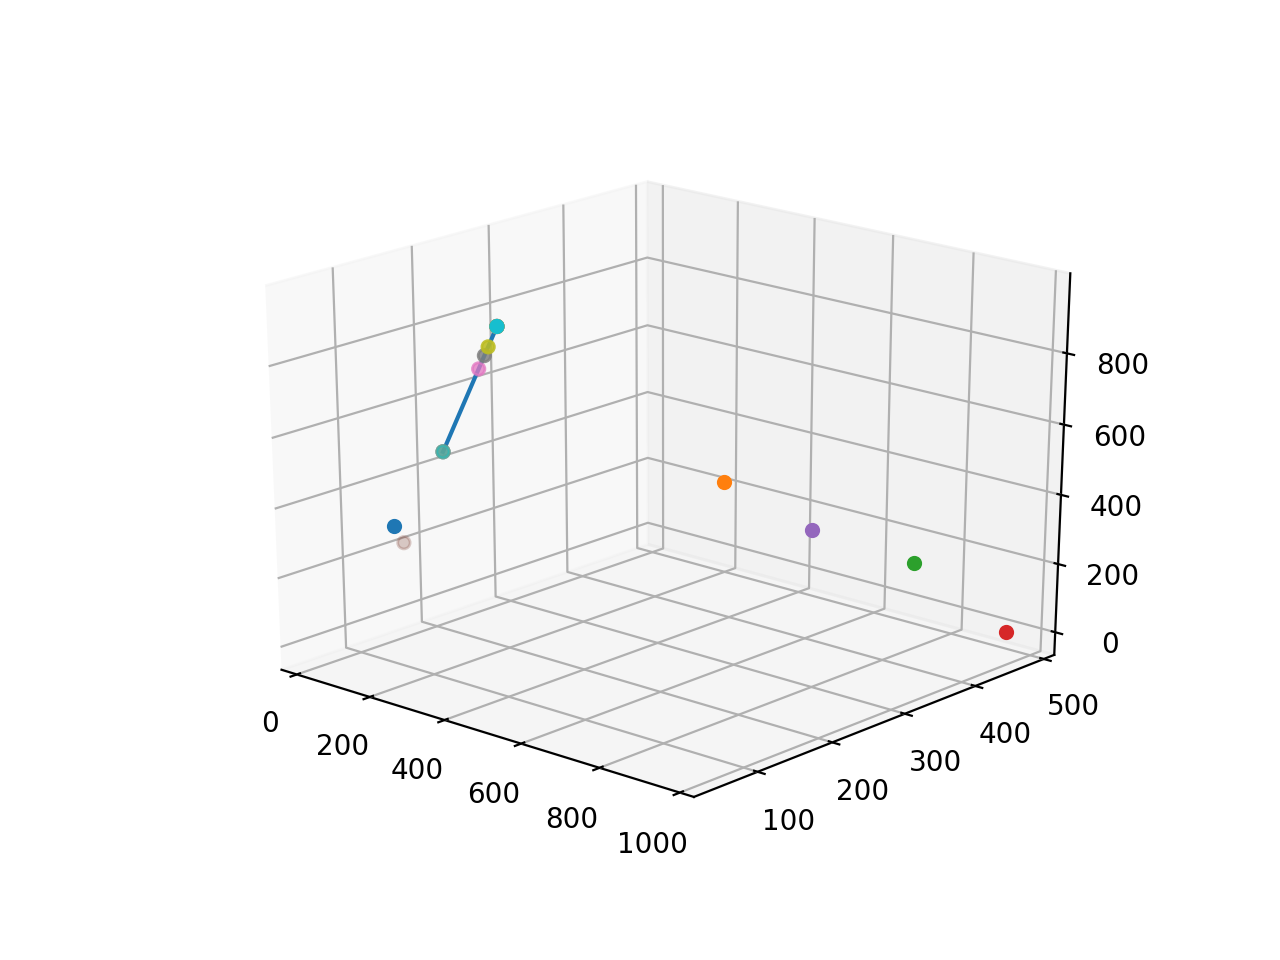

Time for Creation of Toy Data: 0.1191565990447998


In [12]:
main(100, 5, 1, 5, 1000, 0)

In [8]:
df = pd.read_csv("toy_data_final.csv", sep=",")
df

Event Number  X - Coordinate  Y - Coordinate  Z - Coordinate  Track?
0               0      557.966142       96.517051      260.109400       0
1               0      639.662652      841.185727      259.327750       0
2               0      970.875708      296.943202      707.627631       0
3               0      502.754924       55.222073      893.020406       0
4               0      430.301528      961.974233      135.013461       0
5               0      560.921824      569.410425      478.443976       1
6               0      510.999070      735.759689      296.507488       1
7               0      576.864062      516.288762      536.543233       1
8               0      581.377144      501.250573      552.990529       1
9               0      482.273623      831.476706      191.821615       1
10              1      948.379714      263.229560      130.222540       0
11              1      997.311499      828.243676      270.333183       0
12              1      882.697874       19.557664      132.782561       0
13              1      812.042237      100.099025        6.614799       0
14              1      884.164856      139.379455      294.389056       0
15              1      493.882156      278.470844      303.019750       1
16              1      554.930998      183.678756      191.392790       1
17              1      400.358097      423.688023      474.027191       1
18              1      492.253130      281.000274      305.998401       1
19              1      350.588196      500.967012      565.030764       1
20              2      644.232966      449.472138      525.319142       0
21              2      775.626919       90.484869       62.716461       0
22              2      237.282803      208.274844      762.452781       0
23              2      222.761305      528.908759       53.010535       0
24              2      577.515558      652.958926      692.614950       0
25              2      869.419533       72.650873      761.381358       1
26              2      594.941205      456.653347      151.547117       1
27              2      786.071406      189.257117      576.199008       1
28              2      888.309863       46.222800      803.351774       1
29              2      846.031194      105.371781      709.417291       1
..            ...             ...             ...             ...     ...
970            97      169.214632      222.551088      973.614830       0
971            97      444.470653      338.843311      513.701379       0
972            97      714.059080      224.207129      504.487543       0
973            97      504.974652      287.078175      714.158765       0
974            97      805.527995      299.711142      603.350398       0
975            97       20.006501      522.861523      236.770511       1
976            97       80.366815      640.827746      653.912489       1
977            97       32.264828      546.818797      321.486155       1
978            97       26.369748      535.297645      280.746052       1
979            97       28.106170      538.691253      292.746235       1
980            98      482.903341      540.238579      663.208282       0
981            98      840.401029      160.390603      252.202955       0
982            98      888.854541      276.988946      284.968356       0
983            98      602.364276      986.231120       35.614077       0
984            98       47.685017      756.010812      583.116862       0
985            98      826.195985      693.368392      796.370376       1
986            98      186.507126      759.870229      749.430205       1
987            98      388.640462      738.856515      764.262687       1
988            98      280.582327      750.090203      756.333415       1
989            98      635.498096      713.193279      782.377024       1
990            99      609.581421      473.522616      419.985368       0
991            99        2.977664      110.884178       74.134514       0
992      